### Model Building on a Synthetic Dataset

### Objective

### Exploratory Data Analysis

In [97]:
# Importing necessary Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import random
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

#Setting random seed for reproducibility
random.seed(42)

In [98]:
os.getcwd()

'C:\\Users\\arun2\\Downloads'

In [99]:
os.chdir("C:\\Users\\arun2\\Downloads")

In [100]:
os.getcwd()

'C:\\Users\\arun2\\Downloads'

In [101]:
train_data = pd.read_csv("codetest_train.txt", delimiter = "\t")
test_data = pd.read_csv("codetest_test.txt", delimiter = "\t")
#Display first few rows of training data
train_data.head()

,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253
0,3.066056,-0.653,0.255,-0.615,-1.833,-0.736,NaN,1.115,-0.171,-0.351,...,-1.607,-1.400,-0.920,-0.198,-0.945,-0.573,0.170,-0.418,-1.244,-0.503
1,-1.910473,1.179,-0.093,-0.556,0.811,-0.468,-0.005,-0.116,-1.243,1.985,...,1.282,0.032,-0.061,NaN,-0.061,-0.302,1.281,-0.850,0.821,-0.260
2,7.830711,0.181,-0.778,-0.919,0.113,0.887,-0.762,1.872,-1.709,0.135,...,-0.237,-0.660,1.073,-0.193,0.570,-0.267,1.435,1.332,-1.147,2.580
3,-2.180862,0.745,-0.245,-1.343,1.163,-0.169,-0.151,-1.100,0.225,1.223,...,0.709,-0.203,-0.136,-0.571,1.682,0.243,-0.381,0.613,1.033,0.400
4,5.462784,1.217,-1.324,-0.958,0.448,-2.873,-0.856,0.603,0.763,0.020,...,0.892,-0.433,-0.877,0.289,0.654,1.230,0.457,-0.754,-0.025,-0.931


### Data Overview

In [102]:
#Summary statistics of the training data
train_data.describe()


,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253
count,5000.000000,4903.000000,4928.000000,4908.000000,4910.000000,4907.000000,4912.000000,4897.000000,4904.000000,4893.000000,...,4910.000000,4883.000000,4914.000000,4894.000000,4902.000000,4886.000000,4900.000000,4921.000000,4904.000000,4904.000000
mean,1.143878,-0.000433,0.002564,0.028877,-0.005437,-0.006759,0.005569,0.001536,-0.001019,0.009744,...,0.013529,0.004941,0.023261,-0.018447,-0.009842,0.016958,-0.004947,0.016868,-0.001351,0.010334
std,5.259896,0.999739,0.997930,1.019337,0.990351,1.006293,0.995799,1.004624,0.997356,0.988310,...,1.001453,0.997330,0.996458,1.005000,0.989228,1.011331,0.991577,1.001358,1.003411,1.006896
min,-26.705570,-3.941000,-3.847000,-3.818000,-3.434000,-3.400000,-4.051000,-3.179000,-3.890000,-3.857000,...,-3.585000,-3.494000,-3.485000,-4.012000,-3.252000,-3.821000,-3.376000,-3.373000,-3.950000,-3.728000
25%,-2.034383,-0.673000,-0.685000,-0.651000,-0.655000,-0.685500,-0.660000,-0.672000,-0.679000,-0.662000,...,-0.665750,-0.676000,-0.661750,-0.692000,-0.663000,-0.647750,-0.679500,-0.647000,-0.695000,-0.677000
50%,1.166835,-0.011000,-0.003000,0.047500,0.003500,-0.007000,-0.008000,-0.003000,-0.021500,0.017000,...,0.026000,-0.028000,0.027000,-0.035000,-0.010500,0.002500,0.010000,0.020000,0.002500,0.015000
75%,4.439549,0.677000,0.674500,0.719000,0.668000,0.654000,0.649000,0.679000,0.670250,0.698000,...,0.671750,0.670000,0.702500,0.655000,0.651000,0.709750,0.660250,0.692000,0.672250,0.705250
max,26.347818,3.831000,3.996000,3.199000,4.962000,3.106000,4.296000,4.166000,3.798000,4.195000,...,3.365000,3.456000,3.881000,3.690000,3.629000,4.144000,3.873000,3.187000,3.724000,3.956000


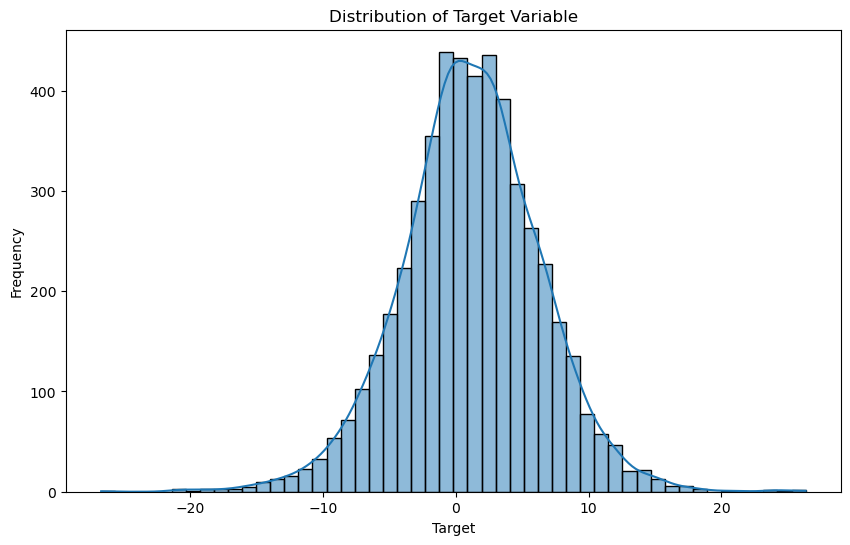

In [103]:
# Visuallizing the distribution of the target variable
plt.figure(figsize =(10,6))
sns.histplot(train_data["target"], bins = 50, kde = True)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

## Data Preparation

In [104]:
non_numeric_cols = [col for col, dtype in train_data.dtypes.items() if dtype not in ["float64","int64"]]
if non_numeric_cols:
    print(f"Columns with non-numeric data types:{non_numeric_cols}")
else:
    print("All Columns have float or integer data types.")
    
    


Columns with non-numeric data types:['f_61', 'f_121', 'f_215', 'f_237']


In [105]:
train_data["f_61"].head(),train_data["f_121"].head(),train_data["f_215"].head(),train_data["f_23"].head()

(0    b
 1    a
 2    b
 3    a
 4    b
 Name: f_61, dtype: object,
 0    D
 1    A
 2    B
 3    C
 4    E
 Name: f_121, dtype: object,
 0       red
 1      blue
 2    orange
 3      blue
 4    orange
 Name: f_215, dtype: object,
 0    0.308
 1      NaN
 2    0.740
 3   -1.670
 4   -0.755
 Name: f_23, dtype: float64)

In [106]:
non_numeric_features = train_data.dtypes[train_data.dtypes == "object"].index


In [107]:
# Encoding the non-numeric features
encoder = LabelEncoder()
for feature in non_numeric_features:
    train_data[feature]= encoder.fit_transform(train_data[feature].astype(str))

train_data.dtypes[train_data.dtypes != "float64"]

f_61     int32
f_121    int32
f_215    int32
f_237    int32
dtype: object

In [108]:
non_numeric_cols =[col for col, dtypes in test_data.dtypes.items() if dtypes not in ["float64","int64"]]

if non_numeric_cols:
    print(f"Columns with non-numeric data types:{non_numeric_cols}")
else:
    print("All Columns have float or integer data types.")
    


Columns with non-numeric data types:['f_61', 'f_121', 'f_215', 'f_237']


In [109]:
test_data["f_61"].head(),test_data["f_121"].head(),test_data["f_215"].head(),test_data["f_23"].head()

(0    e
 1    d
 2    d
 3    e
 4    b
 Name: f_61, dtype: object,
 0    A
 1    B
 2    C
 3    E
 4    C
 Name: f_121, dtype: object,
 0    yellow
 1       red
 2       NaN
 3      blue
 4       NaN
 Name: f_215, dtype: object,
 0   -0.522
 1   -0.073
 2    0.259
 3    0.194
 4    1.575
 Name: f_23, dtype: float64)

In [110]:
non_numeric_features_test = test_data.dtypes[test_data.dtypes == 'object'].index

In [111]:
#encoding the non-numeric features
encoder = LabelEncoder()
for feature in non_numeric_features_test:
    test_data[feature] = encoder.fit_transform(test_data[feature].astype(str))

test_data.dtypes[test_data.dtypes != "float64"]


f_61     int32
f_121    int32
f_215    int32
f_237    int32
dtype: object

### Missing Values

In [112]:
# Check missing values in train_data
missing_train = train_data.isna().sum()
print(f"Missing values in train_data\n:{missing_train[missing_train > 0]}")

Missing values in train_data
:f_0       97
f_1       72
f_2       92
f_3       90
f_4       93
        ... 
f_249    114
f_250    100
f_251     79
f_252     96
f_253     96
Length: 250, dtype: int64


In [113]:
# Check missing values in test_data
missing_test = test_data.isna().sum()
print(f"Missing values in test_data\n:{missing_test[missing_test > 0]}")

Missing values in test_data
:f_0      28
f_1      17
f_2      17
f_3      18
f_4      22
         ..
f_249    20
f_250    19
f_251    22
f_252    21
f_253    15
Length: 250, dtype: int64


In [114]:
# Filling missing values in train_data with median

for col in train_data.columns:
    median_value = train_data[col].median()
    train_data[col].fillna(median_value, inplace = True)
    
# Filling missing values in test_data with median

for col in test_data.columns:
    median_value = test_data[col].median()
    test_data[col].fillna(median_value, inplace = True)
    


In [115]:
# Check missing values in train_data
missing_train = train_data.isna().sum()
print(f"Missing values in train_data\n:{missing_train[missing_train > 0]}")


# Check missing values in test_data
missing_test = test_data.isna().sum()
print(f"Missing values in test_data\n:{missing_test[missing_test > 0]}")

Missing values in train_data
:Series([], dtype: int64)
Missing values in test_data
:Series([], dtype: int64)


### Modeling

#### Linear Regression

In [116]:
#Separating features and target variable from training data

X = train_data.drop("target", axis = 1)
y= train_data["target"]
# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size= 0.2, random_state = 42)

# Normalizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_Scaled = scaler.transform(test_data)

# Initializing the model
lr_model = LinearRegression()

# Fitting the model to the training data

lr_model.fit(X_train_scaled, y_train)
# Making predictions on the validation set
y_val_pred = lr_model.predict(X_val_scaled)

# Calculating the mean_squared error

mse = mean_squared_error(y_val, y_val_pred)
mse








14.010723344651986

### Random Forest Regressor

### Why is scaling not Required

In [117]:
# Initializing the model

rf_model = RandomForestRegressor(random_state = 42)
#Fitting the model to the training data
rf_model.fit(X_train_scaled, y_train)
#Making predictions on the validation set
y_val_pred_rf = rf_model.predict(X_val_scaled)
#calculating the mean squared error for Random Forest
mse_rf = mean_squared_error(y_val,y_val_pred_rf)
mse_rf

12.025551828152306

### Comparing Multiple Regression Models


In [ ]:
# Initializing the models
lasso_model = Lasso(random_state=42)
ridge_model = Ridge(random_state=42)

# Fitting the models to the training data
lasso_model.fit(X_train_scaled, y_train)
ridge_model.fit(X_train_scaled, y_train)

# Making predictions on the validation set
y_val_pred_lasso = lasso_model.predict(X_val_scaled)
y_val_pred_ridge = ridge_model.predict(X_val_scaled)

# Calculating the MSE and RMSE for all models
mse_lasso = mean_squared_error(y_val, y_val_pred_lasso)
mse_ridge = mean_squared_error(y_val, y_val_pred_ridge)

rmse_lr = np.sqrt(mse)
rmse_rf = np.sqrt(mse_rf)
rmse_lasso = np.sqrt(mse_lasso)
rmse_ridge = np.sqrt(mse_ridge)

mse_values_all = [mse, mse_rf, mse_lasso, mse_ridge]
rmse_values_all = [rmse_lr, rmse_rf, rmse_lasso, rmse_ridge]

mse_values_all, rmse_values_all

### Comparing RMSE and R-Squared Among Models


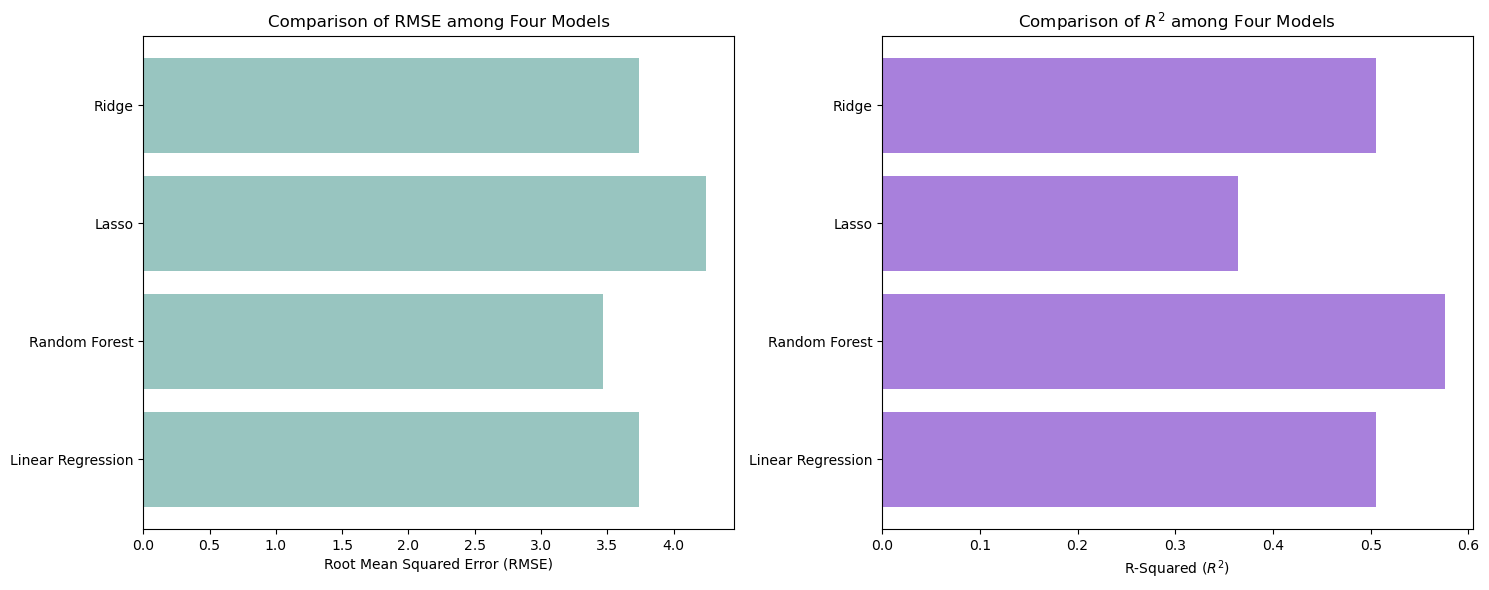

In [119]:
# Your color palette
color1 = '#98C5C0'  # Light teal
color2 = '#A880DC'  # Light purple

models_all = ['Linear Regression', 'Random Forest', 'Lasso', 'Ridge']

# Calculating R-squared for all models
r2_lr = lr_model.score(X_val_scaled, y_val)
r2_rf = rf_model.score(X_val_scaled, y_val)
r2_lasso = lasso_model.score(X_val_scaled, y_val)
r2_ridge = ridge_model.score(X_val_scaled, y_val)

r2_values_all = [r2_lr, r2_rf, r2_lasso, r2_ridge]

# Creating the bar plot for RMSE and R-squared
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].barh(models_all, rmse_values_all, color=color1)
ax[0].set_xlabel('Root Mean Squared Error (RMSE)')
ax[0].set_title('Comparison of RMSE among Four Models')

ax[1].barh(models_all, r2_values_all, color=color2)
ax[1].set_xlabel('R-Squared ($R^2$)')
ax[1].set_title('Comparison of $R^2$ among Four Models')

plt.tight_layout()
plt.show()